In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [64]:
# reading the CSV file
df = pd.read_csv("sms-spam.csv")

In [65]:
# displaying the dataframe
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


DATA CLEANING

In [51]:
print(df.columns)  # used to display the columns of the data

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [66]:
df.drop(
    columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True
)  # drop the columns that are not named

In [67]:
df.rename(columns={"v1": "result", "v2": "input"}, inplace=True)
df.head()

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
print(df["result"].value_counts())  # used to display the counts

result
ham     4825
spam     747
Name: count, dtype: int64


In [68]:
print(df.isnull().sum())  # used to display the counts that are null
print(df.duplicated().sum())  # used to display the counts that are duplicate

result    0
input     0
dtype: int64
403


In [69]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


for better representation, we are using PIE CHART to represent it.
PIE CHARTS can be created using matplotlib library

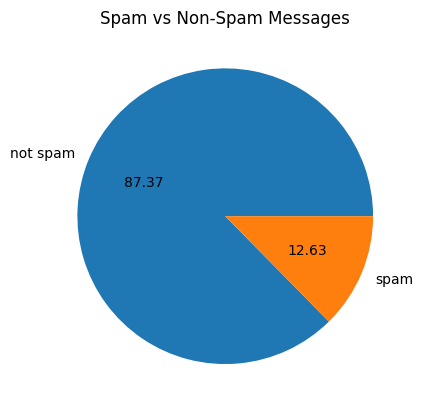

In [57]:
plt.pie(df["result"].value_counts(), labels=["not spam", "spam"], autopct="%.2f")
plt.title("Spam vs Non-Spam Messages")
plt.show()

In [71]:
encoder = LabelEncoder()
df["result"] = encoder.fit_transform(df["result"])

# displaying the edited dataframe
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1368\3647552255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result'] = encoder.fit_transform(df['result'])


,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


DATA PREPROCESSING

In [59]:
# peforming preprocessing such as tokenization (converting the text into tokens or words), removing special characters,
# removing stop words and punctuation and finallying stemming the data.
# also, converting to lower case first and then pre-processing the data

In [72]:
stop_words = stopwords.words("English")

In [74]:
def transform_text(text):
    useful_text = []
    text = text.lower()
    removedSC = list()
    for i in text:
        if i.isalnum() or i.isspace():
            removedSC.append(i)
    text = "".join(removedSC)

    words = nltk.word_tokenize(text)
    for word in words:
        if word not in stop_words:
            useful_text.append(word)
    return " ".join(useful_text)

#function for transforming the text is ready

In [75]:
# will create a new column to store the transformed text -> 'processed'
df["processed"] = df["input"].apply(transform_text)

# displaying the edited dataframe with a new column 'processed'
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1368\3718936499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['input'].apply(transform_text)


,result,input,processed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


Using wordcloud module to create word clouds, which are visual representations of text data, where the size of each word indicates its frequency or importance

In [76]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [79]:
# creating a wordcloud for the SPAM messages
spamWC = wc.generate(df[df["result"] == 1]["processed"].str.cat(sep=" "))

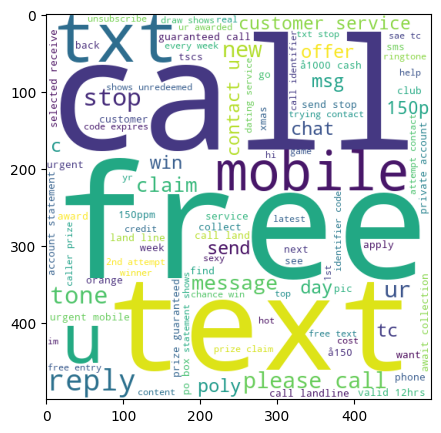

In [ ]:
# displaying the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(spamWC)

In [85]:
# extracting all spam words and appending in a list
spamWordsList = list()

for sent in df[df["result"] == 1]["processed"].tolist():
    for word in sent.split():
        spamWordsList.append(word)

In [87]:
# counting the frequency of the spam words and printing most common words
spamWordsDictionary = Counter(spamWordsList)
spamWordsDictionary.most_common(35)

[('call', 303),
 ('free', 188),
 ('2', 155),
 ('txt', 126),
 ('u', 123),
 ('ur', 119),
 ('mobile', 105),
 ('text', 103),
 ('stop', 103),
 ('4', 97),
 ('claim', 96),
 ('reply', 93),
 ('prize', 81),
 ('get', 69),
 ('new', 64),
 ('urgent', 58),
 ('send', 57),
 ('nokia', 54),
 ('cash', 51),
 ('contact', 51),
 ('service', 48),
 ('win', 47),
 ('please', 47),
 ('phone', 43),
 ('guaranteed', 42),
 ('per', 41),
 ('customer', 40),
 ('18', 38),
 ('tone', 38),
 ('16', 37),
 ('week', 37),
 ('chat', 35),
 ('draw', 33),
 ('awarded', 31),
 ('mins', 31)]

In [88]:
# converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(35))

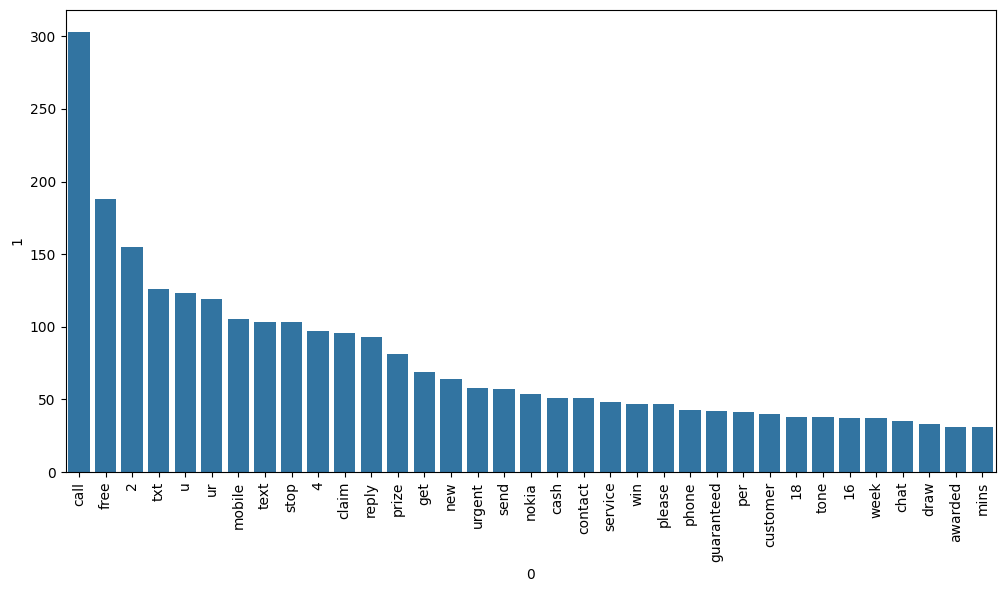

In [89]:
# creating and displaying a bar plot of the mostCommonSPAM dataframe
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=mostCommonSPAM, x=0, y=1)
plt.xticks(rotation="vertical")
plt.show()

MODEL BUILDING

In [ ]:
# Using NaiveBayes classifier on textual data, so will firstly perform it on the dataset.
# we need to give numerical inputs to the classifier model, so will have to convert the 'processed' column into vectors.

In [90]:
# converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [91]:
# transforming the data of processed column
x = cv.fit_transform(df["processed"]).toarray()

# printing size of X
x.shape

(5169, 9396)

In [92]:
# storing the values of the 'result' column
y = df["result"].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [93]:
# splitting the data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [94]:
# creating the objects for the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
# training the dataset for GaussianNB and printing its Accuracy and Precision
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8878143133462283
0.515695067264574


In [ ]:
# training the dataset for MultinomialNB and printing its Accuracy and Precision
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.971953578336557
0.8405797101449275


In [98]:
# training the dataset for BernoulliNB and printing its Accuracy and Precision
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
0.9423076923076923


In [102]:
# to enhance the detection using 'TfidfVectorizer' for vectorization
tf = TfidfVectorizer()

# transforming the data of processed column
x = tf.fit_transform(df["processed"]).toarray()

# storing the values of the 'result' column
y = df["result"].values

# splitting the training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [103]:
# training the dataset for GaussianNB and printing its Accuracy and Precision
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8945841392649904
0.5142857142857142


In [104]:
# training the dataset for MultinomialNB and printing its Accuracy and Precision
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9690522243713733
1.0


In [105]:
# training the dataset for BernoulliNB and printing its Accuracy and Precision
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.97678916827853
0.9333333333333333


Now, the model is prepared
we have to host the website, for that pipeling needs to be done
the text which we will get, has to be transformed first, then vectorized and then apply the algorithm

SAVING THE MODEL TO DISK

In [106]:
# we will pickle 2 files
# saving the vectorizer along with the trained model so that both can be used later for transforming new text data and making predictions without having to re-fit or re-train the model from scratch.
import pickle

pickle.dump(tf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))